In [1]:
# importation des données 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#importation du jeu de données 
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
#trouver les duplicate

In [4]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
data.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

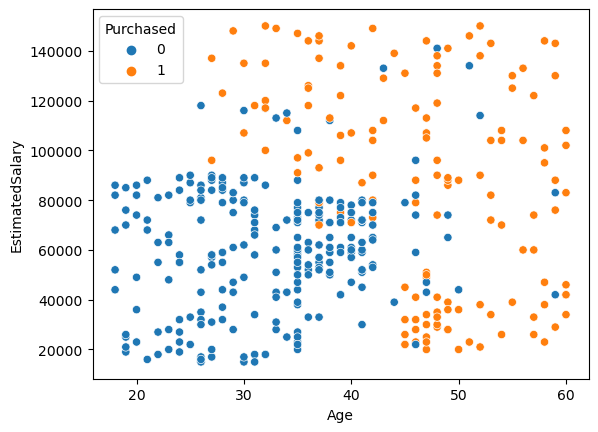

In [7]:
#faire un scatterplot pour afficher les classes 

sns.scatterplot(x="Age", y = "EstimatedSalary", data = data, hue="Purchased")

<AxesSubplot:>

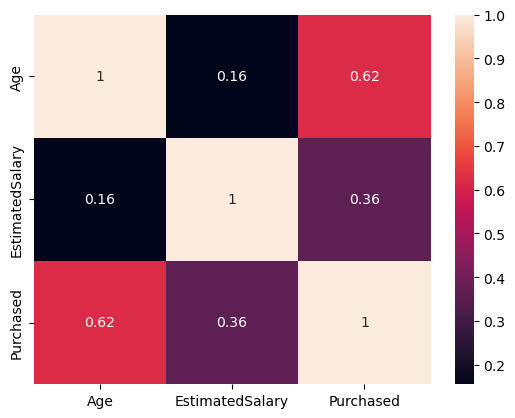

In [8]:
# matrixe de correlation 
sns.heatmap(data.corr(), annot= True)

In [10]:
X = data.drop(['Purchased'], axis=1)
y = data[['Purchased']]

In [11]:
#importe sklearn spliter les données 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=123)
#random corespont a un melange afin d'avoir l es même resultas 
#test_size deduire la taille du trening en traver la taille du texte du texte 

In [12]:
X_train

,Age,EstimatedSalary
71,24,27000
94,29,83000
273,39,106000
386,49,39000
35,35,27000
...,...,...
230,35,147000
98,35,73000
322,41,52000
382,44,139000


In [13]:
# standardise les donnée 
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform (X_train)
X_test = sc.transform(X_test)

In [14]:
X_train


array([[-1.29433783, -1.2775733 ],
       [-0.81535062,  0.39831343],
       [ 0.1426238 ,  1.08662405],
       [ 1.10059822, -0.91845471],
       [-0.24056596, -1.2775733 ],
       [-0.71955317, -1.57683878],
       [-0.52795829, -1.54691224],
       [-0.24056596, -1.39727949],
       [ 1.00480078, -0.85860162],
       [ 1.00480078,  1.83478777],
       [-0.04897108,  0.69757892],
       [ 1.9627752 , -0.94838126],
       [-1.48593271,  0.33846033],
       [ 0.1426238 ,  0.15890104],
       [-0.04897108,  0.15890104],
       [ 1.29219311, -1.39727949],
       [ 0.23842125, -0.14036445],
       [-0.14476852, -1.09801401],
       [-1.39013527, -1.24764675],
       [-1.77332504,  0.18882759],
       [-0.52795829,  1.95449396],
       [ 0.8132059 ,  0.54794617],
       [-0.62375573,  0.03919485],
       [-0.71955317,  0.57787272],
       [ 1.77118032, -0.28999719],
       [-0.62375573,  0.18882759],
       [-0.71955317,  0.30853378],
       [-0.14476852, -0.52940958],
       [ 0.8132059 ,

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() #ici on extensi
lr.fit(X_train, y_train)

c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# on travail sur le y_pred_train

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_train = lr.predict(X_train)
cmt = confusion_matrix(y_train, y_pred_train)
print('accuracy_score: ', accuracy_score(y_train, y_pred_train))

accuracy_score:  0.8432835820895522


<AxesSubplot:>

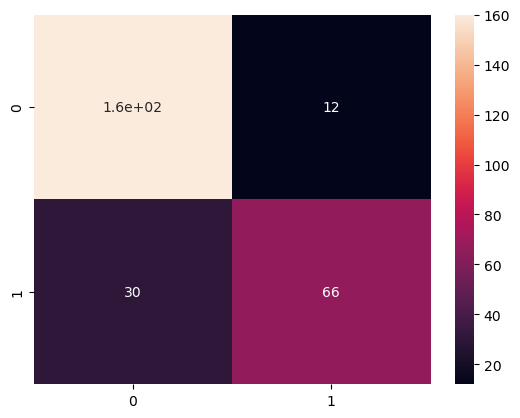

In [17]:
sns.heatmap(cmt,annot=True)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       172
           1       0.85      0.69      0.76        96

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



le precision : se calcule pour chaque classe 
recall : sur il a du mal au niveau de la classe 1

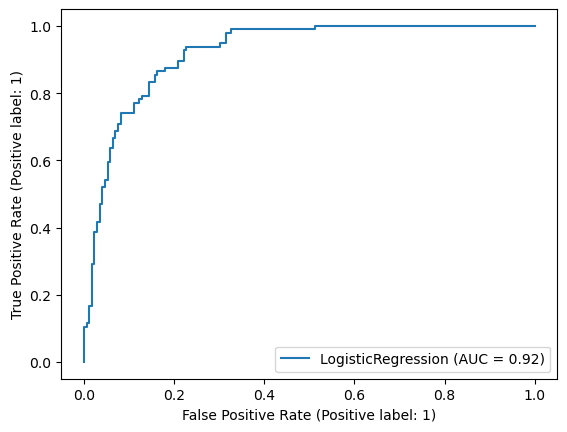

In [19]:
from sklearn.metrics import  RocCurveDisplay
roc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

# ici on travail sur le y_pred_test

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_test = lr.predict(X_test)
cmt = confusion_matrix(y_test, y_pred_test)
print('accuracy_score: ', accuracy_score(y_test, y_pred_test))

accuracy_score:  0.8409090909090909


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        85
           1       0.81      0.72      0.76        47

    accuracy                           0.84       132
   macro avg       0.83      0.81      0.82       132
weighted avg       0.84      0.84      0.84       132



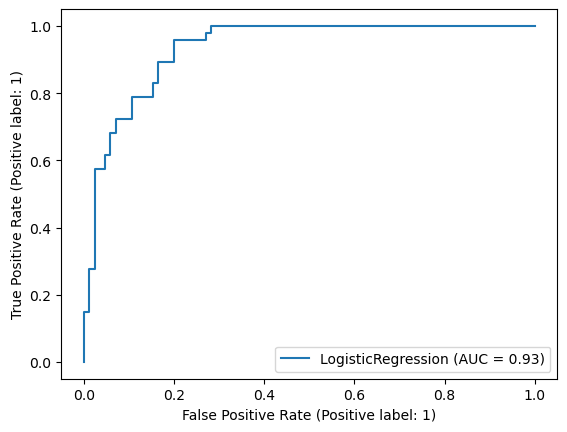

In [22]:
from sklearn.metrics import  RocCurveDisplay
roc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

In [23]:
## maintenet faire une prediction 
prediction = lr.predict(sc.transform([[30,250000]]))
prediction

c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
# pour cree le PKL
#import pickle
#pickle.dump(lr, open('nom.pkl', 'wb')) 